In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
seed = 42
np.random.seed(seed)

In [6]:
# Load the data
df = pd.read_csv("C:\Salary Data.csv.xls")

In [7]:
# Create the feature and target variables
X = df.drop('Salary', axis=1)
y = (df['Salary'] > df['Salary'].median()).astype(int)

In [8]:
# Split the data into train and test sets
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=seed)

In [9]:
# Define the preprocessing steps
numeric_features = ["Age", "Years of Experience"]
numeric_transformer = Pipeline(
    steps=[
        ("imputer", SimpleImputer(strategy="mean")),
        ("scaler", StandardScaler())]
)



categorical_features = ["Gender", "Education Level", "Job Title"]
categorical_transformer = Pipeline(
    steps=[
       ('imputer', SimpleImputer(strategy='most_frequent')),
        ("encoder", OneHotEncoder(handle_unknown="ignore")),
    ]
)



preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, numeric_features),
        ("cat", categorical_transformer, categorical_features),
    ]
)



# Define the Logistic Regression model
model = Pipeline(
    steps=[
        ("preprocessor", preprocessor),
        ("classifier", LogisticRegression()),
    ]
)

In [10]:
# Train the model
model.fit(x_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['Age',
                                                   'Years of Experience']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Gender', 'Education Level',
                                                   'Job Title'])])),
                ('classifier', LogisticRegression())])

In [11]:
# Make predictions on the test set
y_pred = model.predict(x_test)


{'Accuracy': 0.9066666666666666, 'Precision': 0.967741935483871, 'Recall': 0.8333333333333334, 'F1-score': 0.8955223880597015}


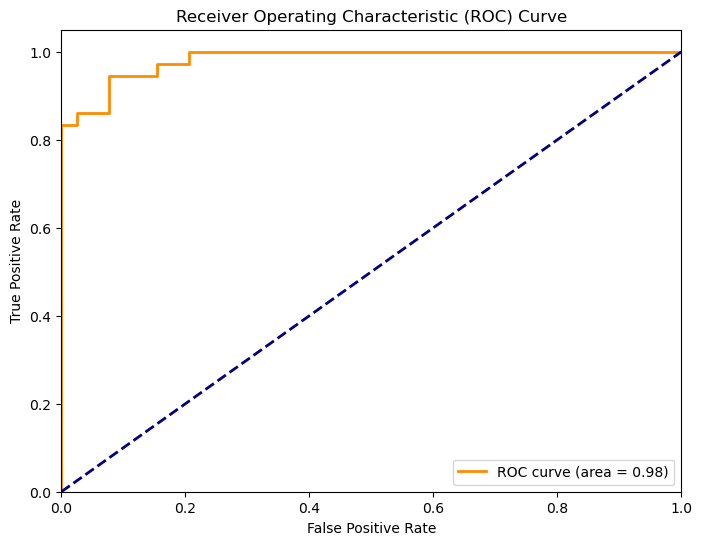

In [12]:
# Make predictions on the test set
y_pred = model.predict(x_test)

# Evaluate the model
metrics = {
    'Accuracy': accuracy_score(y_test, y_pred),
    'Precision': precision_score(y_test, y_pred),
    'Recall': recall_score(y_test, y_pred),
    'F1-score': f1_score(y_test, y_pred)
}

print(metrics)

# Plot the ROC curve
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(x_test)[:, 1])
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()